<a href="https://colab.research.google.com/github/amolrasam2696/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

## **Importing Libraries**

In [ ]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Dataset From Drive**

In [ ]:
meta_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone Project-4/Copy of Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Capstone Project-4/Copy of Zomato Restaurant reviews.csv')

# **1. Meta Data**

In [ ]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
meta_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [ ]:
meta_df.shape

(105, 6)

We have 106 rows and 6 columns.

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
meta_df_1= meta_df.copy()

We have some Null values in Collections and 1 null in Timings.

### Let's Drop Unnecessary Columns.

In [ ]:
#dropping unneccesary column
meta_df_1 = meta_df_1.drop(['Links', 'Timings'],axis = 1)
meta_df_1.head()

Name   Cost  \
0                 Beyond Flavours    800   
1                        Paradise    800   
2                        Flechazo  1,300   
3  Shah Ghouse Hotel & Restaurant    800   
4      Over The Moon Brew Company  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

### Now let's handle Null Values.

In [ ]:
meta_df_1.isnull().sum()

Name            0
Cost            0
Collections    54
Cuisines        0
dtype: int64

54 Null values in Collections.

In [ ]:
# replacing nan values
meta_df_1['Collections'] = meta_df_1['Collections'].replace(np.nan , "Unknown", regex=True)

In [ ]:
meta_df_1.isnull().sum()

Name           0
Cost           0
Collections    0
Cuisines       0
dtype: int64

We have removed all null values.

In [ ]:
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    object
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB


Here we can see our Cost Column is of type Object let's check it.

In [ ]:
meta_df_1.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
meta_df_1['Cost'] = meta_df_1['Cost'].str.replace(",","").astype('int64')

In [ ]:
meta_df_1['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [ ]:
meta_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Cost         105 non-null    int64 
 2   Collections  105 non-null    object
 3   Cuisines     105 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.4+ KB


We have converted Cost column to integer.

### **EDA**

### Top 10 Most Expensive Restruant.

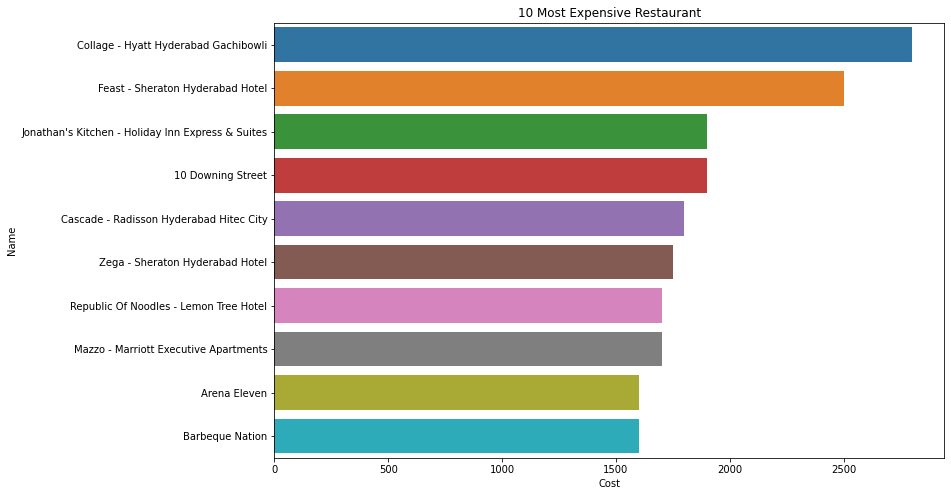

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(ascending=False, by='Cost')[:10] )
plt.title('10 Most Expensive Restaurant')
plt.show()

### Top 10 Cheapest Resturants.

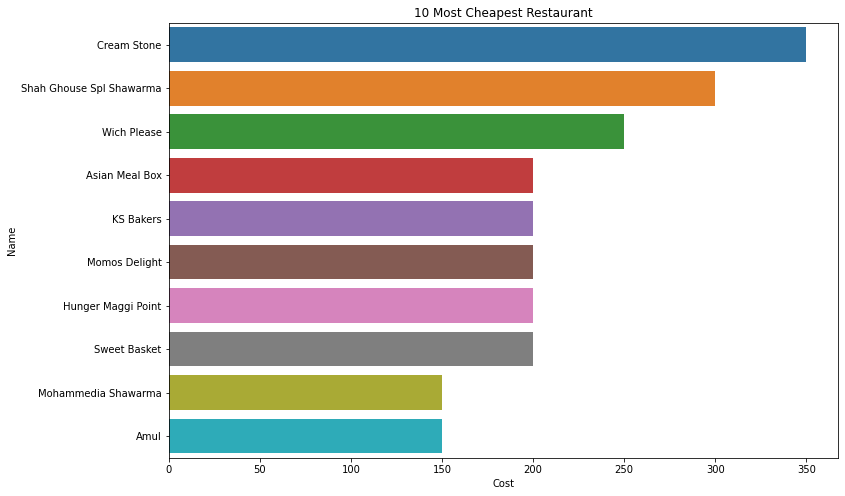

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='Cost', y='Name', data=meta_df_1.sort_values(ascending=False, by='Cost')[-10:] )
plt.title('10 Most Cheapest Restaurant')
plt.show()

### Most Popular Cuisines.

In [ ]:
meta_df_1.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

In [ ]:
# For loops to extract every single Cuisine name.
cuisine_list = meta_df_1.Cuisines.str.split(', ') 
cuisine_ = []
for names in cuisine_list:
  for name in names:
    cuisine_.append(name)
cuisine_series = pd.Series(cuisine_)    
    

In [ ]:
# Creating DataFrame of Cuisines and their Counts.
cuisine_df = cuisine_series.to_frame(name='Cuisines')
cuisine_df= cuisine_df.value_counts().reset_index()
cuisine_df.rename(columns={0: 'Count'}, inplace=True)
cuisine_df.head()

Cuisines  Count
0  North Indian     61
1       Chinese     43
2   Continental     21
3       Biryani     16
4         Asian     15

In [ ]:
cuisine_df.shape

(44, 2)

Text(0.5, 1.0, 'Most popular cuisines at Restaurants')

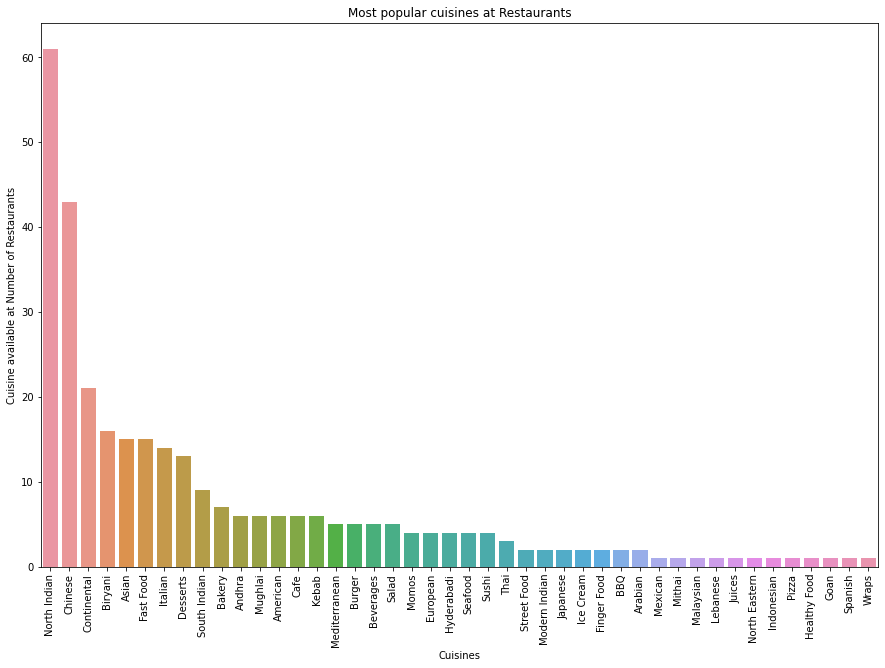

In [ ]:
# Plot of Cuisines in Resturants.
fig = plt.figure(figsize=[15,10])
sns.barplot(data=cuisine_df, x='Cuisines', y= 'Count')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants')

Observation:

1.   North Indian, Chinese, Continental are the Most popular Cuisine available at most  Resturants.
2.   Goan, Spanish, Wraps are the least popular Cuisines.



### Top Collections.

In [ ]:
collections = meta_df_1['Collections'].value_counts().reset_index()
collections.head()

index  Collections
0                                      Unknown           54
1  Food Hygiene Rated Restaurants in Hyderabad            4
2                                Great Buffets            2
3                                  New on Gold            2
4                          Hyderabad's Hottest            2

In [ ]:
collections.rename(columns={'index': 'Collection'}, inplace=True)
collections.rename(columns={'Collections': 'Count'}, inplace=True)
collections.head()

Collection  Count
0                                      Unknown     54
1  Food Hygiene Rated Restaurants in Hyderabad      4
2                                Great Buffets      2
3                                  New on Gold      2
4                          Hyderabad's Hottest      2

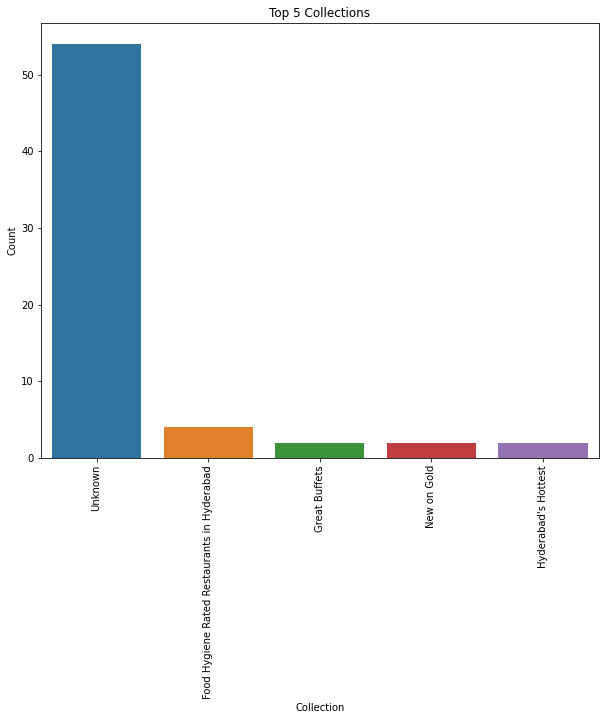

In [ ]:
# Top 5 collections
plt.rcParams['figure.figsize']= (10,8)
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[:5] )
plt.xticks(rotation=90)
plt.title('Top 5 Collections')
plt.show()

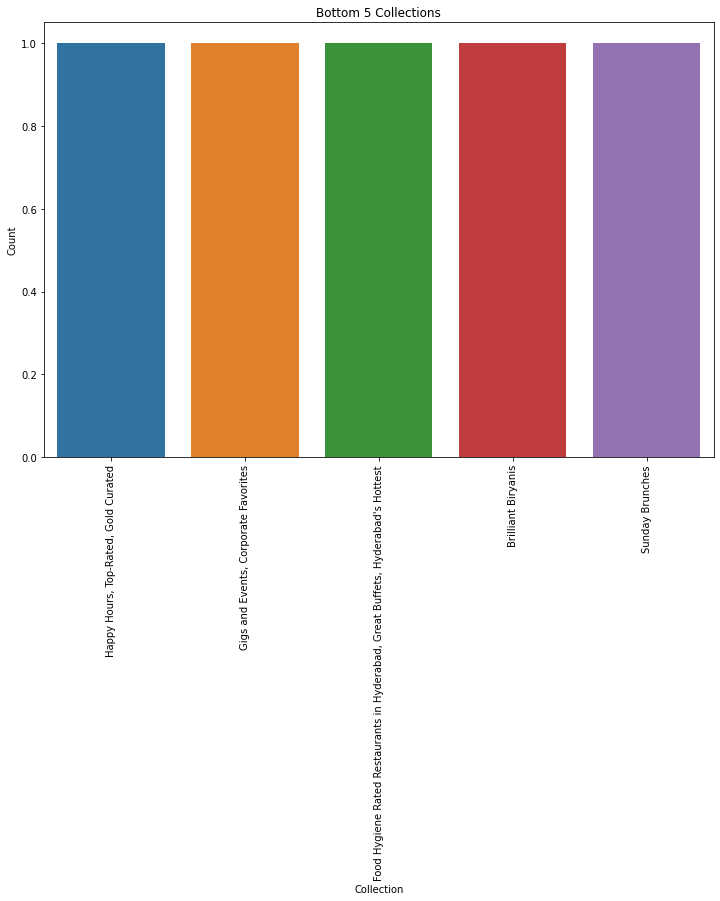

In [ ]:
# Bottom 5 collections
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='Collection', y='Count', data=collections.sort_values(ascending=False, by='Count')[-5:])
plt.xticks(rotation=90)
plt.title('Bottom 5 Collections')
plt.show()

# **Clustering on  Meta Data**



In [ ]:
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
clustering_df= meta_df.copy()

In [ ]:
clustering_df.drop(['Links'],axis = 1 ,inplace = True)

In [ ]:
clustering_df

Name   Cost  \
0                           Beyond Flavours    800   
1                                  Paradise    800   
2                                  Flechazo  1,300   
3            Shah Ghouse Hotel & Restaurant    800   
4                Over The Moon Brew Company  1,200   
..                                      ...    ...   
100                               IndiBlaze    600   
101                            Sweet Basket    200   
102                        Angaara Counts 3    500   
103                             Wich Please    250   
104  Republic Of Noodles - Lemon Tree Hotel  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 5 columns]

In [ ]:
clustering_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [ ]:
# changing the data type of the cost function
clustering_df['Cost'] = clustering_df['Cost'].str.replace(",","").astype('int64')

In [ ]:
clustering_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

### Merging the two dataframes SO that we can add the average ratings of the restaurants also.

In [ ]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
review_df = reviews_df.copy()

In [ ]:
review_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Remove nan rating in Rating column
review_df.dropna(subset=['Rating'],inplace=True)

There is one Rating in str which is Like lets replace it with 4.

In [ ]:
review_df['Rating'] = review_df['Rating'].replace('Like', '4')

In [ ]:
# Changing data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

Creating a new df to get the average ratings for each Restaurant.

In [ ]:
ratings_df  = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [ ]:
ratings_df .sort_values(by='Rating',ascending = False).head(10)

Restaurant  Rating
3                 AB's - Absolute Barbecues    4.88
11                                   B-Dubs    4.81
2            3B's - Buddies, Bar & Barbecue    4.76
67                                 Paradise    4.70
35                                 Flechazo    4.66
87                           The Indi Grill    4.60
97          Zega - Sheraton Hyderabad Hotel    4.45
64               Over The Moon Brew Company    4.34
16                          Beyond Flavours    4.28
19  Cascade - Radisson Hyderabad Hitec City    4.26

In [ ]:
df_cluster = clustering_df.merge(ratings_df, left_on='Name',right_on='Restaurant')
df_cluster

Name  Cost  \
0                   Beyond Flavours   800   
1                          Paradise   800   
2                          Flechazo  1300   
3    Shah Ghouse Hotel & Restaurant   800   
4        Over The Moon Brew Company  1200   
..                              ...   ...   
95                       Desi Bytes   400   
96                Hyderabadi Daawat   600   
97  Zega - Sheraton Hyderabad Hotel  1750   
98                         Triptify   400   
99                 Chinese Pavilion  1000   

                                          Collections  \
0   Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                 Hyderabad's Hottest   
2                  Great Buffets, Hyderabad's Hottest   
3                              Late Night Restaurants   
4   Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                ...   
95                                                NaN   
96        Food Hygiene Rated Restaurants in Hyderabad   
97                                                NaN   
98                                                NaN   
99                                                NaN   

                                             Cuisines  \
0   Chinese, Continental, Kebab, European, South I...   
1                      Biryani, North Indian, Chinese   
2        Asian, Mediterranean, North Indian, Desserts   
3   Biryani, North Indian, Chinese, Seafood, Bever...   
4   Asian, Continental, North Indian, Chinese, Med...   
..                                                ...   
95                              North Indian, Chinese   
96                       Hyderabadi, Chinese, Mughlai   
97                                       Asian, Sushi   
98                                       North Indian   
99                                   Chinese, Seafood   

                                              Timings  \
0       12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                      11 AM to 11 PM   
2               11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                     12 Noon to 2 AM   
4   12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...   
..                                                ...   
95            1 PM to 2 AM (Mon, Wed-Sun), Tue Closed   
96                       12:30pm to 11:30pm (Mon-Sun)   
97                            12Noon to 2AM (Mon-Sun)   
98                                     11 AM to 11 PM   
99                  12 Noon to 3:30 PM, 7 PM to 11 PM   

                         Restaurant  Rating  
0                   Beyond Flavours   4.280  
1                          Paradise   4.700  
2                          Flechazo   4.660  
3    Shah Ghouse Hotel & Restaurant   3.210  
4        Over The Moon Brew Company   4.340  
..                              ...     ...  
95                       Desi Bytes   2.900  
96                Hyderabadi Daawat   3.830  
97  Zega - Sheraton Hyderabad Hotel   4.450  
98                         Triptify   3.550  
99                 Chinese Pavilion   3.745  

[100 rows x 7 columns]

In [ ]:
df_cluster.Rating.isnull().sum()

0

In [ ]:
df_cluster=df_cluster.loc[:,['Name','Cost','Cuisines','Rating']]
df_cluster['Cuisines'] = df_cluster['Cuisines'].apply(lambda x : x.lower())
df_cluster.head()

Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  Rating  
0  chinese, continental, kebab, european, south i...    4.28  
1                     biryani, north indian, chinese    4.70  
2       asian, mediterranean, north indian, desserts    4.66  
3  biryani, north indian, chinese, seafood, bever...    3.21  
4  asian, continental, north indian, chinese, med...    4.34

### Lets Create a set of Cuisines for Our Clustering Model.

In [ ]:
# Creating a function for splitting our Cuisines and storing in list.
def cuisine_list(cuisines):
  
   
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
# Applying our function on Cuisine column.
df_cluster['cuisine']=df_cluster['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
# Exploding Cuisine for getting seperate cuisine for each Resturants.
df_cluster=df_cluster.explode('cuisine')
df_cluster.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   

   Rating       cuisine  
0    4.28  south indian  
0    4.28         kebab  
0    4.28  north indian  
0    4.28      european  
0    4.28   continental

In [ ]:
df_cluster['cuisine']

0     south indian
0            kebab
0     north indian
0         european
0      continental
          ...     
97           asian
97           sushi
98    north indian
99         seafood
99         chinese
Name: cuisine, Length: 301, dtype: object

In [ ]:
df_cluster.reset_index(inplace=True)

### Brinning all the cuisines into their respective sets of spicy food, Healthy food, Fast Food and Dessert.

In [ ]:
cuisine_set=[]
for i in df_cluster['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    cuisine_set.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    cuisine_set.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    cuisine_set.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    cuisine_set.append('Dessert')

In [ ]:
cuisine_sets=pd.DataFrame(cuisine_set)
cuisine_sets.columns=['cuisine']
cuisine_sets

cuisine
0    Healthy food
1      spicy food
2      spicy food
3    Healthy food
4      spicy food
..            ...
296    spicy food
297     fast food
298    spicy food
299  Healthy food
300     fast food

[301 rows x 1 columns]

In [ ]:
cuisine_sets.value_counts()

cuisine     
spicy food      131
fast food        81
Healthy food     62
Dessert          27
dtype: int64

In [ ]:
df_cluster.drop(['cuisine'],axis=1,inplace=True)

In [ ]:
df_cluster.head()

index             Name  Cost  \
0      0  Beyond Flavours   800   
1      0  Beyond Flavours   800   
2      0  Beyond Flavours   800   
3      0  Beyond Flavours   800   
4      0  Beyond Flavours   800   

                                            Cuisines  Rating  
0  chinese, continental, kebab, european, south i...    4.28  
1  chinese, continental, kebab, european, south i...    4.28  
2  chinese, continental, kebab, european, south i...    4.28  
3  chinese, continental, kebab, european, south i...    4.28  
4  chinese, continental, kebab, european, south i...    4.28

In [ ]:
cluster_dataset=pd.concat([df_cluster,cuisine_sets],axis=1)
cluster_dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
cluster_dataset

Name  Cost  \
0                    Beyond Flavours   800   
1                    Beyond Flavours   800   
2                    Beyond Flavours   800   
3                    Beyond Flavours   800   
4                    Beyond Flavours   800   
..                               ...   ...   
296  Zega - Sheraton Hyderabad Hotel  1750   
297  Zega - Sheraton Hyderabad Hotel  1750   
298                         Triptify   400   
299                 Chinese Pavilion  1000   
300                 Chinese Pavilion  1000   

                                              Cuisines  Rating       cuisine  
0    chinese, continental, kebab, european, south i...   4.280  Healthy food  
1    chinese, continental, kebab, european, south i...   4.280    spicy food  
2    chinese, continental, kebab, european, south i...   4.280    spicy food  
3    chinese, continental, kebab, european, south i...   4.280  Healthy food  
4    chinese, continental, kebab, european, south i...   4.280    spicy food  
..                                                 ...     ...           ...  
296                                       asian, sushi   4.450    spicy food  
297                                       asian, sushi   4.450     fast food  
298                                       north indian   3.550    spicy food  
299                                   chinese, seafood   3.745  Healthy food  
300                                   chinese, seafood   3.745     fast food  

[301 rows x 5 columns]

### Now Lets Make Dummies of cuisine set.

In [ ]:
# converting str to vectors using get-dummies.
cluster_dataset = pd.get_dummies(cluster_dataset, columns=["cuisine"],prefix=None)
cluster_dataset

Name  Cost  \
0                    Beyond Flavours   800   
1                    Beyond Flavours   800   
2                    Beyond Flavours   800   
3                    Beyond Flavours   800   
4                    Beyond Flavours   800   
..                               ...   ...   
296  Zega - Sheraton Hyderabad Hotel  1750   
297  Zega - Sheraton Hyderabad Hotel  1750   
298                         Triptify   400   
299                 Chinese Pavilion  1000   
300                 Chinese Pavilion  1000   

                                              Cuisines  Rating  \
0    chinese, continental, kebab, european, south i...   4.280   
1    chinese, continental, kebab, european, south i...   4.280   
2    chinese, continental, kebab, european, south i...   4.280   
3    chinese, continental, kebab, european, south i...   4.280   
4    chinese, continental, kebab, european, south i...   4.280   
..                                                 ...     ...   
296                                       asian, sushi   4.450   
297                                       asian, sushi   4.450   
298                                       north indian   3.550   
299                                   chinese, seafood   3.745   
300                                   chinese, seafood   3.745   

     cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0                  0                     1                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  0                     1                  0   
4                  0                     0                  0   
..               ...                   ...                ...   
296                0                     0                  0   
297                0                     0                  1   
298                0                     0                  0   
299                0                     1                  0   
300                0                     0                  1   

     cuisine_spicy food  
0                     0  
1                     1  
2                     1  
3                     0  
4                     1  
..                  ...  
296                   1  
297                   0  
298                   1  
299                   0  
300                   0  

[301 rows x 8 columns]

Now lets Implode our dataset using Groupby Method.

In [ ]:
cluster_dataset=cluster_dataset.groupby(['Name','Cost','Cuisines','Rating'])[['cuisine_Dessert','cuisine_Healthy food','cuisine_fast food','cuisine_spicy food']].sum().reset_index()

In [ ]:
cluster_dataset

Name  Cost  \
0                    Beyond Flavours   800   
1                    Beyond Flavours   800   
2                    Beyond Flavours   800   
3                    Beyond Flavours   800   
4                    Beyond Flavours   800   
..                               ...   ...   
296  Zega - Sheraton Hyderabad Hotel  1750   
297  Zega - Sheraton Hyderabad Hotel  1750   
298                         Triptify   400   
299                 Chinese Pavilion  1000   
300                 Chinese Pavilion  1000   

                                              Cuisines  Rating  \
0    chinese, continental, kebab, european, south i...   4.280   
1    chinese, continental, kebab, european, south i...   4.280   
2    chinese, continental, kebab, european, south i...   4.280   
3    chinese, continental, kebab, european, south i...   4.280   
4    chinese, continental, kebab, european, south i...   4.280   
..                                                 ...     ...   
296                                       asian, sushi   4.450   
297                                       asian, sushi   4.450   
298                                       north indian   3.550   
299                                   chinese, seafood   3.745   
300                                   chinese, seafood   3.745   

     cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0                  0                     1                  0   
1                  0                     0                  0   
2                  0                     0                  0   
3                  0                     1                  0   
4                  0                     0                  0   
..               ...                   ...                ...   
296                0                     0                  0   
297                0                     0                  1   
298                0                     0                  0   
299                0                     1                  0   
300                0                     0                  1   

     cuisine_spicy food  
0                     0  
1                     1  
2                     1  
3                     0  
4                     1  
..                  ...  
296                   1  
297                   0  
298                   1  
299                   0  
300                   0  

[301 rows x 8 columns]

We have successfully implode our dataset we are back to 100 rows.

In [ ]:
#Now lets drop the Unnecessary columns for our model.
cluster_data= cluster_dataset.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data

Cost  Rating  cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0     800   4.280                0                     1                  0   
1     800   4.280                0                     0                  0   
2     800   4.280                0                     0                  0   
3     800   4.280                0                     1                  0   
4     800   4.280                0                     0                  0   
..    ...     ...              ...                   ...                ...   
296  1750   4.450                0                     0                  0   
297  1750   4.450                0                     0                  1   
298   400   3.550                0                     0                  0   
299  1000   3.745                0                     1                  0   
300  1000   3.745                0                     0                  1   

     cuisine_spicy food  
0                     0  
1                     1  
2                     1  
3                     0  
4                     1  
..                  ...  
296                   1  
297                   0  
298                   1  
299                   0  
300                   0  

[301 rows x 6 columns]

In [ ]:
X=cluster_data

## **Finding Optimal Number of Clusters**

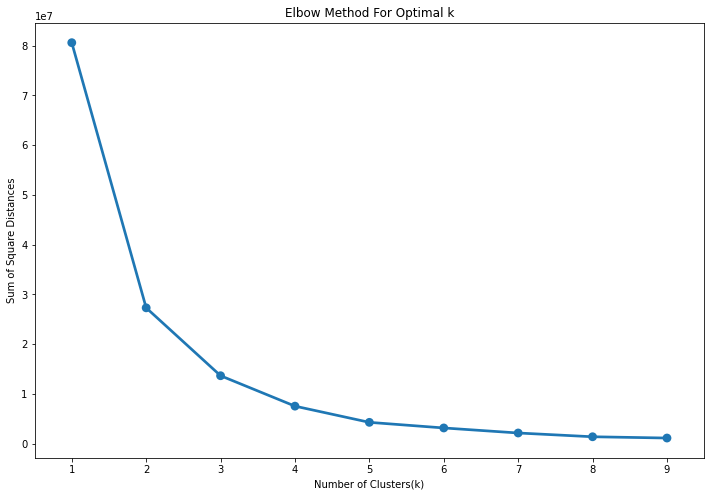

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,10):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,10):
  km = KMeans(n_clusters=k, random_state=1)
  km.fit(X)
  silhouette_avg.append(silhouette_score(X, km.labels_))

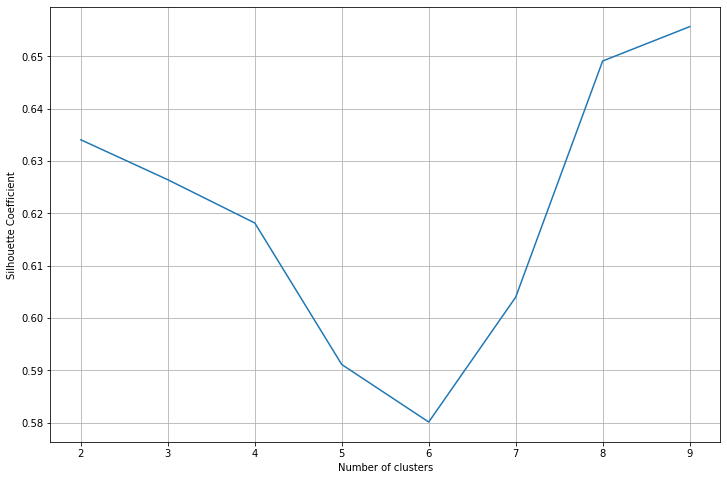

In [ ]:
# plot the results
plt.plot(range(2,10), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

We can see from abve two plots the Optimal number of Clusters is 5 .

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(random_state=11, n_clusters=5)
model.fit(X)

KMeans(n_clusters=5, random_state=11)

In [ ]:
cluster_labels = model.predict(X)

In [ ]:
cluster_dataset['labels'] = cluster_labels
cluster_dataset.head(10)

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
1  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
2  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
3  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
4  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
5  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
6         Paradise   800                     biryani, north indian, chinese   
7         Paradise   800                     biryani, north indian, chinese   
8         Paradise   800                     biryani, north indian, chinese   
9         Flechazo  1300       asian, mediterranean, north indian, desserts   

   Rating  cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0    4.28                0                     1                  0   
1    4.28                0                     0                  0   
2    4.28                0                     0                  0   
3    4.28                0                     1                  0   
4    4.28                0                     0                  0   
5    4.28                0                     0                  1   
6    4.70                0                     0                  0   
7    4.70                0                     0                  0   
8    4.70                0                     0                  1   
9    4.66                1                     0                  0   

   cuisine_spicy food  labels  
0                   0       0  
1                   1       0  
2                   1       0  
3                   0       0  
4                   1       0  
5                   0       0  
6                   1       0  
7                   1       0  
8                   0       0  
9                   0       2

Text(0.5, 0, 'Cost')

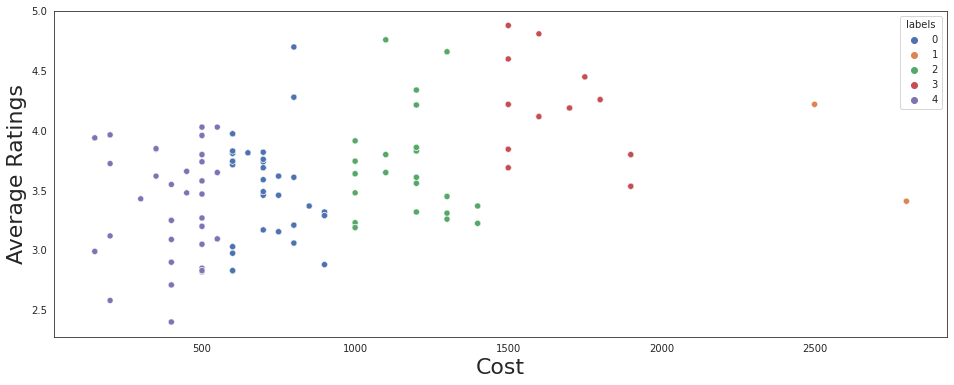

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Rating',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

We can See from abve scatter plot Resturant are clustered well on coat and ratings.

Text(0.5, 0, 'Cost')

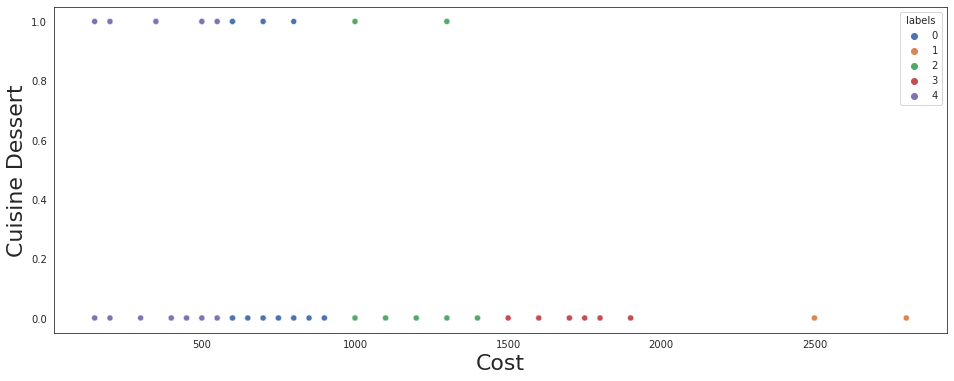

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='cuisine_Dessert',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Dessert',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

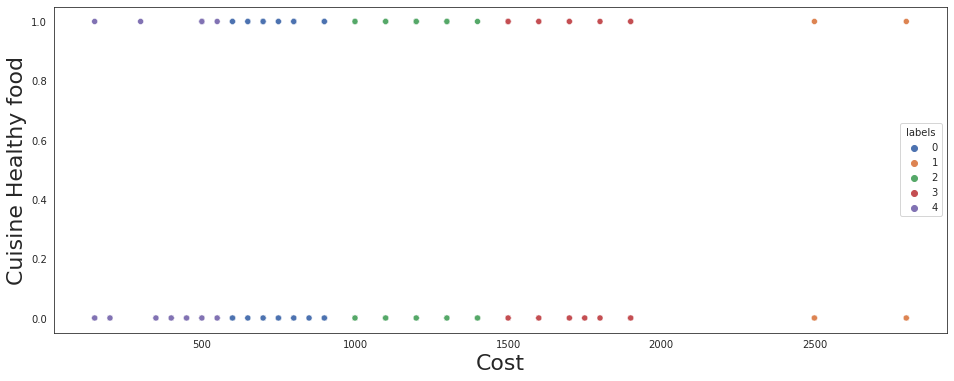

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='cuisine_Healthy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine Healthy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

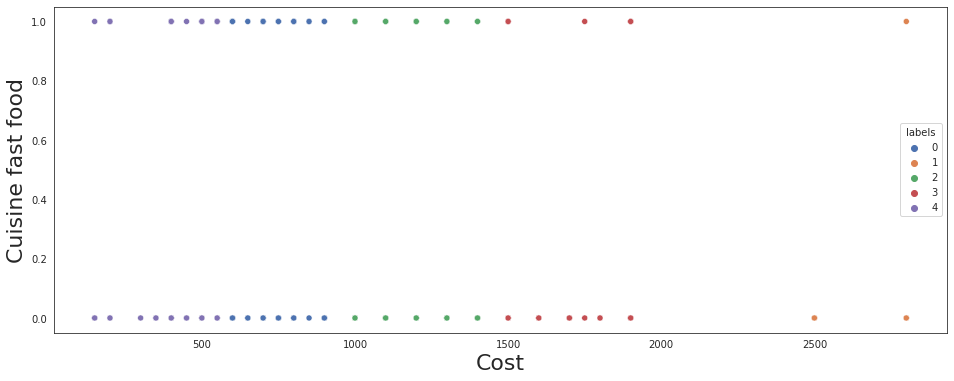

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='cuisine_fast food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine fast food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

Text(0.5, 0, 'Cost')

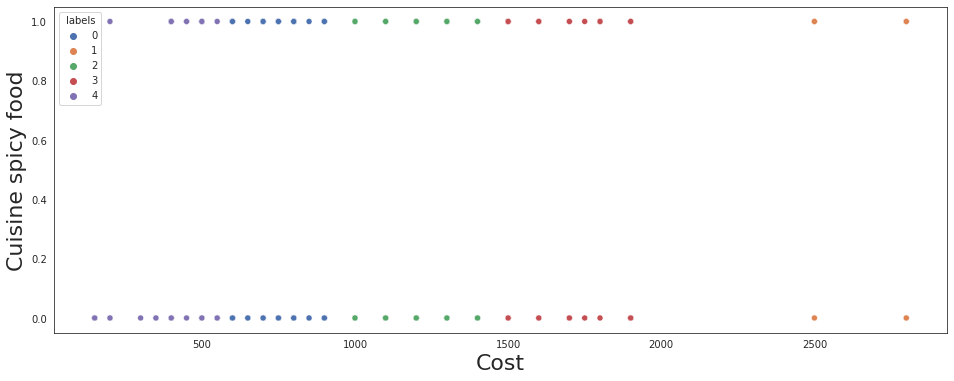

In [ ]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='cuisine_spicy food',x='Cost',data=cluster_dataset,hue='labels', palette = 'deep')
plt.ylabel('Cuisine spicy food',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

### **Name of Restaurants, Ratings in Different Clusters**

In [ ]:
cluster_1 = cluster_dataset.loc[cluster_dataset['labels']==0]
cluster_1[['Name','Rating','labels']].head()

Name  Rating  labels
0  Beyond Flavours    4.28       0
1  Beyond Flavours    4.28       0
2  Beyond Flavours    4.28       0
3  Beyond Flavours    4.28       0
4  Beyond Flavours    4.28       0

In [ ]:
cluster_2 = cluster_dataset.loc[cluster_dataset['labels']==1]
cluster_2[['Name','Rating','labels']].head()

Name  Rating  labels
175      Feast - Sheraton Hyderabad Hotel    4.22       1
176      Feast - Sheraton Hyderabad Hotel    4.22       1
177      Feast - Sheraton Hyderabad Hotel    4.22       1
178      Feast - Sheraton Hyderabad Hotel    4.22       1
279  Collage - Hyatt Hyderabad Gachibowli    3.41       1

In [ ]:
cluster_3 = cluster_dataset.loc[cluster_dataset['labels']==2]
cluster_3[['Name','Rating','labels']].head()

Name  Rating  labels
9                     Flechazo    4.66       2
10                    Flechazo    4.66       2
11                    Flechazo    4.66       2
12                    Flechazo    4.66       2
18  Over The Moon Brew Company    4.34       2

In [ ]:
cluster_4 = cluster_dataset.loc[cluster_dataset['labels']==3]
cluster_4[['Name','Rating','labels']].head()

Name  Rating  labels
23  The Fisherman's Wharf    4.22       3
24  The Fisherman's Wharf    4.22       3
25  The Fisherman's Wharf    4.22       3
26  The Fisherman's Wharf    4.22       3
27  The Fisherman's Wharf    4.22       3

In [ ]:
cluster_5 = cluster_dataset.loc[cluster_dataset['labels']==4]
cluster_5[['Name','Rating','labels']].head()

Name  Rating  labels
28                   eat.fit    3.20       4
29                   eat.fit    3.20       4
30                   eat.fit    3.20       4
31                   eat.fit    3.20       4
32  Shah Ghouse Spl Shawarma    3.43       4

## **Name of Cuisines in Different Clusters**

In [ ]:
cluster_dataset.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
1  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
2  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
3  Beyond Flavours   800  chinese, continental, kebab, european, south i...   
4  Beyond Flavours   800  chinese, continental, kebab, european, south i...   

   Rating  cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0    4.28                0                     1                  0   
1    4.28                0                     0                  0   
2    4.28                0                     0                  0   
3    4.28                0                     1                  0   
4    4.28                0                     0                  0   

   cuisine_spicy food  labels  
0                   0       0  
1                   1       0  
2                   1       0  
3                   0       0  
4                   1       0

In [ ]:
def cuisine_list(cuisines):
  
   
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines
cluster_dataset['Cuisines']=cluster_dataset['Cuisines'].apply(lambda x:cuisine_list(x))

In [ ]:
cluster_dataset.head()

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  [south indian, kebab, north indian, european, ...   
1  Beyond Flavours   800  [south indian, kebab, north indian, european, ...   
2  Beyond Flavours   800  [south indian, kebab, north indian, european, ...   
3  Beyond Flavours   800  [south indian, kebab, north indian, european, ...   
4  Beyond Flavours   800  [south indian, kebab, north indian, european, ...   

   Rating  cuisine_Dessert  cuisine_Healthy food  cuisine_fast food  \
0    4.28                0                     1                  0   
1    4.28                0                     0                  0   
2    4.28                0                     0                  0   
3    4.28                0                     1                  0   
4    4.28                0                     0                  0   

   cuisine_spicy food  labels  
0                   0       0  
1                   1       0  
2                   1       0  
3                   0       0  
4                   1       0

In [ ]:
exploded_cuisine = cluster_dataset.explode("Cuisines")

In [ ]:
for i in range (5):
  print('cluster no',i)
  print(exploded_cuisine[exploded_cuisine["labels"]==i]['Cuisines'].unique())
  print('\n')

cluster no 0
['south indian' 'kebab' 'north indian' 'european' 'continental' 'chinese'
 'biryani' 'seafood' 'beverages' 'american' 'mughlai' 'andhra' 'arabian'
 'fast food' 'desserts' 'cafe' 'indonesian' 'asian' 'thai' 'bakery'
 'momos' 'italian' 'salad' 'hyderabadi' 'burger']


cluster no 1
['continental' 'asian' 'modern indian' 'italian' 'north indian' 'chinese']


cluster no 2
['desserts' 'north indian' 'asian' 'mediterranean' 'continental' 'chinese'
 'south indian' 'kebab' 'american' 'italian' 'finger food' 'salad'
 'mexican' 'european' 'bakery' 'juices' 'mughlai' 'spanish' 'andhra'
 'hyderabadi' 'thai' 'sushi' 'momos' 'beverages' 'seafood']


cluster no 3
['goan' 'seafood' 'north indian' 'continental' 'asian' 'mediterranean'
 'kebab' 'bbq' 'european' 'chinese' 'sushi' 'salad' 'japanese' 'italian'
 'american' 'south indian' 'modern indian']


cluster no 4
['north indian' 'healthy food' 'south indian' 'continental' 'lebanese'
 'desserts' 'ice cream' 'street food' 'fast food' 'burger

North indian, Continental and Chinese are available mostly in every Cluster.

# **Sentiment Analysis**

## **Reviews Data**

In [ ]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Our Rating is of dtype Object lets check why.

In [ ]:
reviews_df['Rating'].value_counts()     

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

We have one Like lets replace it with Mean Ratings.

### **Data Cleaning**

In [ ]:
#lets replace Like with NaN.
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
#lets convert Rating Dtype into Float.
reviews_df['Rating']= reviews_df['Rating'].astype('float64')

In [ ]:
reviews_df['Rating'].mean()

3.601044071880333

In [ ]:
reviews_df['Rating'].fillna(3.6, inplace=True)

In [ ]:
# Lets check the Null values in our data.
reviews_df.isnull().sum()

Restaurant     1
Reviewer      39
Review        46
Rating        39
Metadata      39
Time          39
Pictures       1
dtype: int64

In [ ]:
reviews_df.duplicated().sum()

36

In [ ]:
reviews_df.drop_duplicates(inplace=True)
reviews_df.reset_index(inplace=True)

In [ ]:
# spliting metadata column into 2 columns i.e. Reviews and followers
reviews_df['Reviews'],reviews_df['Followers']= reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers']= pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

In [ ]:
reviews_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Reviews  Followers  
0   1 Review , 2 Followers  5/25/2019 15:54       0.0      1.0        2.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20       0.0      3.0        2.0  
2  2 Reviews , 3 Followers  5/24/2019 22:54       0.0      2.0        3.0  
3    1 Review , 1 Follower  5/24/2019 22:11       0.0      1.0        1.0  
4  3 Reviews , 2 Followers  5/24/2019 21:37       0.0      3.0        2.0

In [ ]:
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [ ]:
# lets convert Time to DateTime format and extract year, Month, Days and hours.
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [ ]:
reviews_df.head()

index       Restaurant              Reviewer  \
0      0  Beyond Flavours     Rusha Chakraborty   
1      1  Beyond Flavours  Anusha Tirumalaneedi   
2      2  Beyond Flavours       Ashok Shekhawat   
3      3  Beyond Flavours        Swapnil Sarkar   
4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month   Day  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  25.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  25.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  24.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  24.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  24.0  21.0

In [ ]:
reviews_df.isnull().sum()

index            0
Restaurant       1
Reviewer         3
Review          10
Rating           3
Time             3
Pictures         1
Reviews          3
Followers     1581
Year             3
Month            3
Day              3
Hour             3
dtype: int64

In [ ]:
# Replacing followers and reviews null values into 0
reviews_df['Followers'].fillna(0,inplace=True)
reviews_df['Reviews'].fillna(0,inplace=True)

In [ ]:
# we can drop the remaining missing data
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df.reset_index(inplace = True)

In [ ]:
reviews_df.isnull().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

We have removed all null values.

In [ ]:
reviews_df.shape

(9954, 14)

## **EDA on Reviews Data**

In [ ]:
# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(10,6)})
plt.rcParams['figure.figsize'] = [10,6]

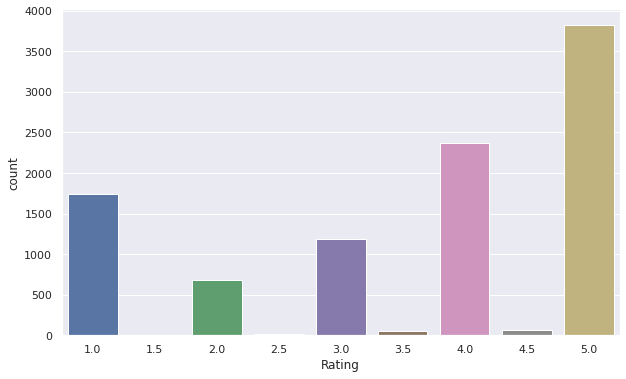

In [ ]:
sns.countplot(reviews_df.Rating)

We can see most people gave 5.0 Ratings.

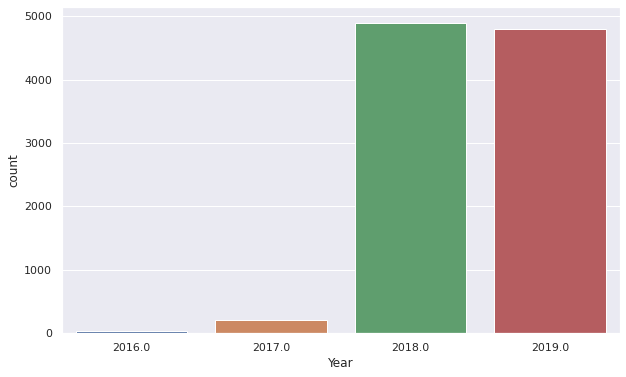

In [ ]:
sns.countplot(reviews_df.Year)

We can see from above plot that most people strated Reviewing since 2018.


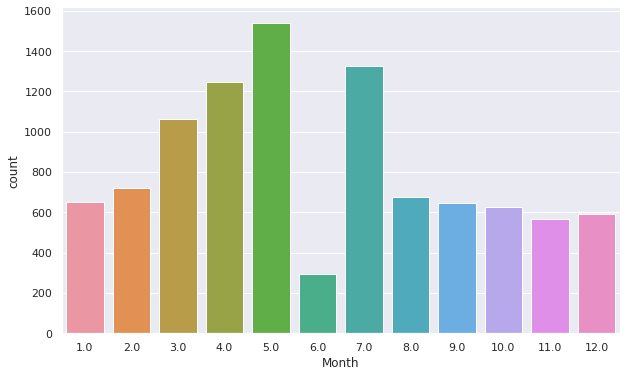

In [ ]:
sns.countplot(reviews_df.Month)

Most Reviews are coming during the month of May and July.

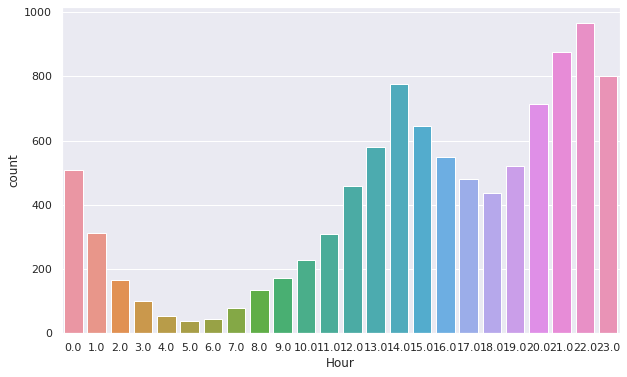

In [ ]:
sns.countplot(reviews_df.Hour)

Most Reviews are coming during Afternoon and at Night which is logical because it is a time of Lunch and Dinner.

In [ ]:
df_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending = False).reset_index()
df_rating[:15]

Restaurant  Rating
0                 AB's - Absolute Barbecues   4.880
1                                    B-Dubs   4.810
2            3B's - Buddies, Bar & Barbecue   4.760
3                                  Paradise   4.700
4                                  Flechazo   4.660
5                            The Indi Grill   4.600
6           Zega - Sheraton Hyderabad Hotel   4.450
7                Over The Moon Brew Company   4.340
8                           Beyond Flavours   4.280
9   Cascade - Radisson Hyderabad Hitec City   4.260
10                    The Fisherman's Wharf   4.220
11         Feast - Sheraton Hyderabad Hotel   4.220
12                     Prism Club & Kitchen   4.215
13    Mazzo - Marriott Executive Apartments   4.190
14                          Barbeque Nation   4.120

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

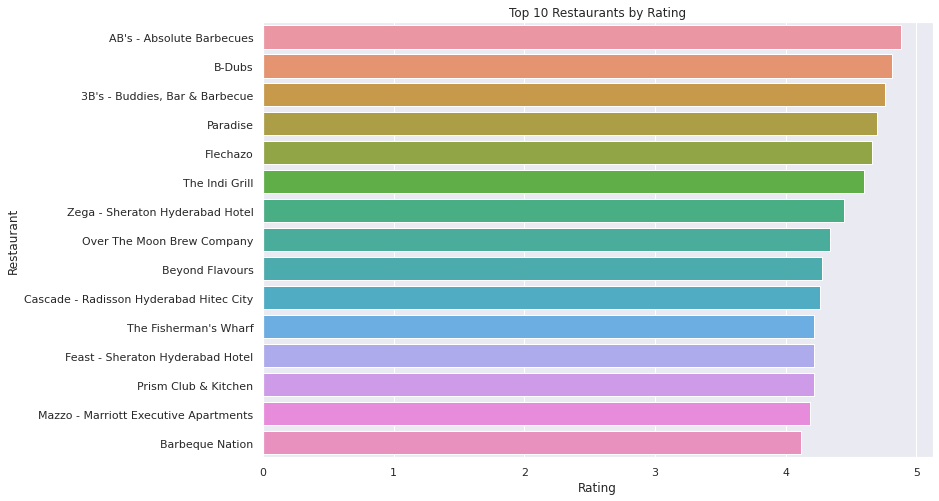

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_rating[:15], x='Rating', y='Restaurant')
plt.title('Top 10 Restaurants by Rating')

In [ ]:
reviews_df.head()

level_0  index       Restaurant              Reviewer  \
0        0      0  Beyond Flavours     Rusha Chakraborty   
1        1      1  Beyond Flavours  Anusha Tirumalaneedi   
2        2      2  Beyond Flavours       Ashok Shekhawat   
3        3      3  Beyond Flavours        Swapnil Sarkar   
4        4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month   Day  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  25.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  25.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  24.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  24.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  24.0  21.0

In [ ]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
df_Reviewer[:15]

Reviewer  Reviews  Followers  Rating
0                     #FOODPORN     35.0     5873.0     5.0
1           #chloesviews // CAH      3.0        1.0     5.0
2                          $ign     50.0       55.0     4.0
3                      4mybanti      7.0        4.0     2.0
4   @FuloriBinaChutneyKaiseBani     86.0      244.0     5.0
5             @Vignesh #FoodMad     20.0      509.0     4.0
6           @foodie.amy6 | AMNA     69.0      703.0     5.0
7                           A K     12.0     2654.0     5.0
8                    A K RAJEEV      1.0        2.0     5.0
9                 A Vinod Kumar      1.0        1.0     1.0
10            AAKRITI BHATNAGAR     40.0      317.0     1.0
11                        ABD X      4.0        0.0     1.0
12                 ABDUL MAJEED      9.0        0.0     5.0
13                      ABHI07💪     16.0      311.0     5.0
14                      ABHINAV      8.0       80.0     1.0

Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

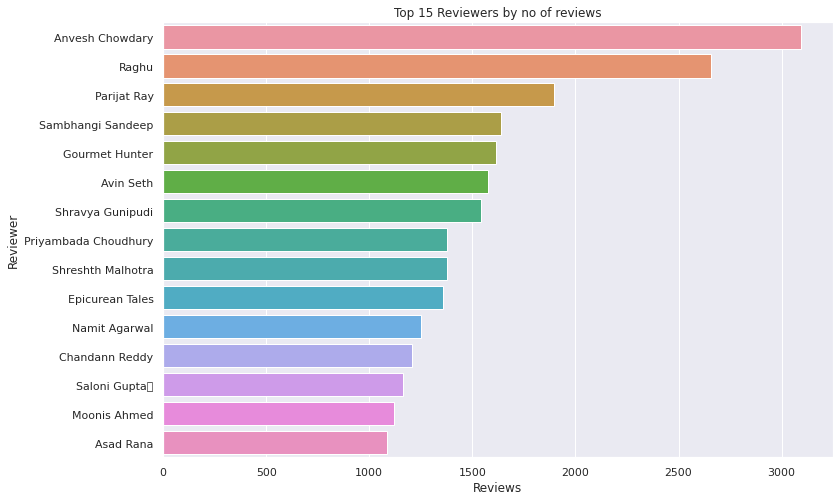

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Folowers')

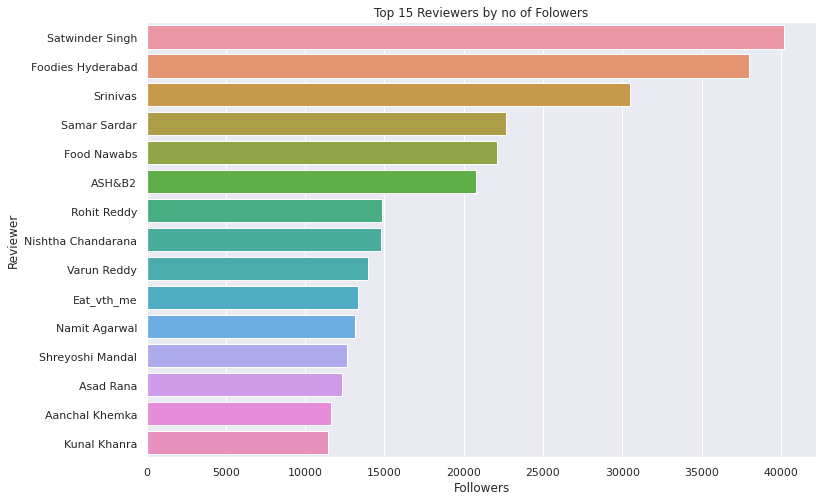

In [ ]:
fig = plt.figure(figsize=[12,8])
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Folowers')

# **Data Preprocessing**

The objective of this step is to clean noise those are less relevant to find the sentiment of Reviewer such as punctuation(.,?,” etc.), special characters(@,%,&,$, etc.), numbers(1,2,3, etc.), emojis and terms which don’t carry much weightage in context to the text.

In [ ]:
#import some liabrary for preprocessing.
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
reviews_df.head(10)

level_0  index       Restaurant              Reviewer  \
0        0      0  Beyond Flavours     Rusha Chakraborty   
1        1      1  Beyond Flavours  Anusha Tirumalaneedi   
2        2      2  Beyond Flavours       Ashok Shekhawat   
3        3      3  Beyond Flavours        Swapnil Sarkar   
4        4      4  Beyond Flavours                Dileep   
5        5      5  Beyond Flavours         Nagabhavani K   
6        6      6  Beyond Flavours       Jamuna Bhuwalka   
7        7      7  Beyond Flavours             Sandhya S   
8        8      8  Beyond Flavours          Akash Thorat   
9        9      9  Beyond Flavours        Smarak Patnaik   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   
5  Ambiance is good, service is good, food is aPr...     5.0   
6  Its a very nice place, ambience is different, ...     5.0   
7  Well after reading so many reviews finally vis...     4.0   
8  Excellent food , specially if you like spicy f...     5.0   
9  Came for the birthday treat of a close friend....     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month   Day  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  25.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  25.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  24.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  24.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  24.0  21.0  
5 2019-05-24 15:22:00       0.0      1.0        0.0  2019.0    5.0  24.0  15.0  
6 2019-05-24 01:02:00       0.0      1.0        0.0  2019.0    5.0  24.0   1.0  
7 2019-05-23 15:01:00       0.0      1.0        0.0  2019.0    5.0  23.0  15.0  
8 2019-05-22 23:12:00       0.0      1.0        1.0  2019.0    5.0  22.0  23.0  
9 2019-05-22 22:37:00       0.0      1.0        1.0  2019.0    5.0  22.0  22.0

In [ ]:
reviews_df.Review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9949    Madhumathi Mahajan Well to start with nice cou...
9950    This place has never disappointed us.. The foo...
9951    Bad rating is mainly because of "Chicken Bone ...
9952    I personally love and prefer Chinese Food. Had...
9953    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

### Removing Punctuation.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    text_nopunct= ''.join([i for i in text if i not in string.punctuation])
    return text_nopunct

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_punctuation)

In [ ]:
reviews_df['Review'][0]

'The ambience was good food was quite good  had Saturday lunch  which was cost effective \nGood place for a sate brunch One can also chill with friends and or parents\nWaiter Soumen Das was really courteous and helpful'

In [ ]:
# function to remove Hashtags and Digits.
def remove_noise(tweet):
  #remove hashtags
  tweet = re.sub(r'#\w+','' , tweet)
  # remove digits
  tweet = re.sub(r'\d+',' ', tweet)
  return tweet

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_noise)

## Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#function for removing stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(stopwords)

In [ ]:
reviews_df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

In [ ]:
all_words

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudos service must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing soumen das arun great guy behavior sincerety good food course would like visit place food goodwe ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place well reading many reviews finally visited placeambience good coming food crispy corn nice tawa fish ok basket biryani disappointed us biryani ok flattering claimed 

We have Some Emojis in our data lets remove it.

In [ ]:
import re
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(remove_emojis)

In [ ]:
all_words = ' '.join([text for text in reviews_df['Review']])

In [ ]:
all_words

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful ambience good pleasant evening service prompt food good good experience soumen das kudos service must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing soumen das arun great guy behavior sincerety good food course would like visit place food goodwe ordered kodi drumsticks basket mutton biryani good thanks pradeep served well enjoyed ambience also good ambiance good service good food apradeecp subro best service food good papiya good hostess ur caption good star restaurant nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place well reading many reviews finally visited placeambience good coming food crispy corn nice tawa fish ok basket biryani disappointed us biryani ok flattering claimed 

We have successfully Removed all emojis.

## **Top Words before stemming**

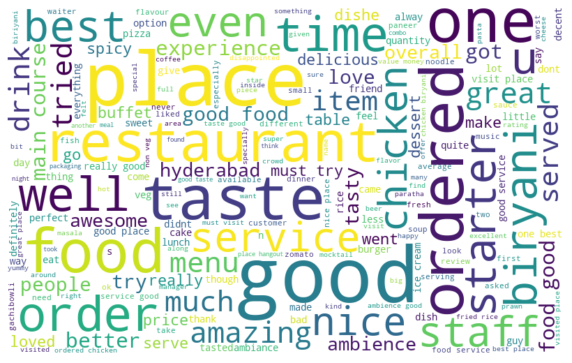

In [ ]:
# create text from all tweets
from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7007),
 ('food', 6488),
 ('place', 5663),
 ('service', 3157),
 ('chicken', 3045),
 ('taste', 2214),
 ('ordered', 2163),
 ('ambience', 2044),
 ('great', 1936),
 ('one', 1885),
 ('really', 1659),
 ('time', 1581),
 ('also', 1577),
 ('nice', 1464),
 ('like', 1450),
 ('best', 1432),
 ('biryani', 1305),
 ('staff', 1295),
 ('try', 1276),
 ('visit', 1255)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

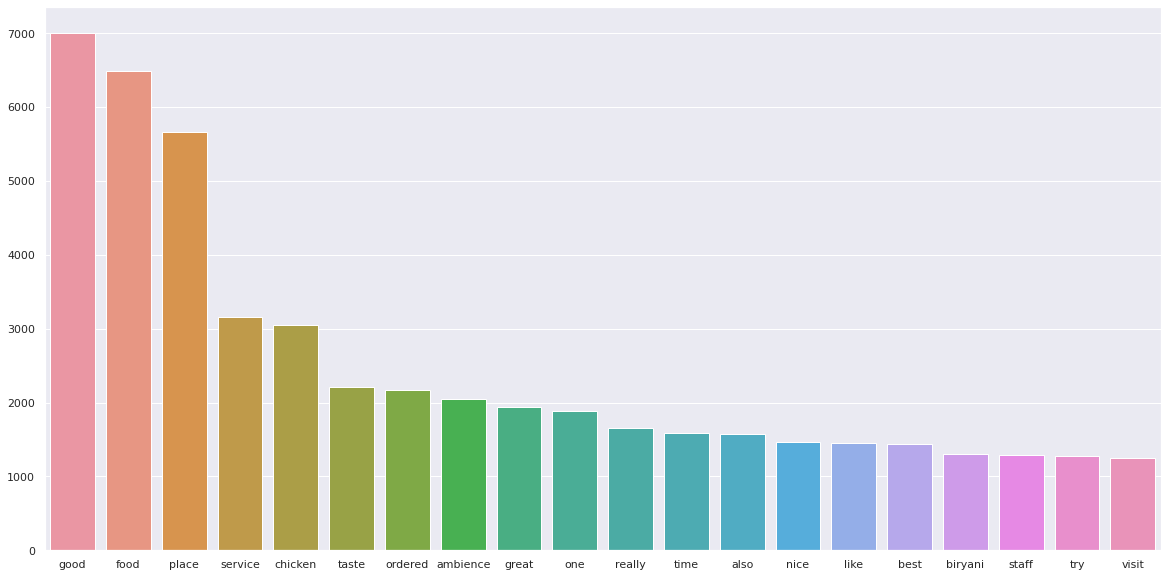

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
sns.barplot(x , y)
plt.show()

These are the Most used words in our Dataset.

### **A funtion for stemming operation**

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
# let apply the function
reviews_df['Review']= reviews_df['Review'].apply(stemming)

In [ ]:
reviews_df.head()

level_0  index       Restaurant              Reviewer  \
0        0      0  Beyond Flavours     Rusha Chakraborty   
1        1      1  Beyond Flavours  Anusha Tirumalaneedi   
2        2      2  Beyond Flavours       Ashok Shekhawat   
3        3      3  Beyond Flavours        Swapnil Sarkar   
4        4      4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  ambienc good food quit good saturday lunch cos...     5.0   
1  ambienc good pleasant even servic prompt food ...     5.0   
2  must tri great food great ambienc thnx servic ...     5.0   
3  soumen das arun great guy behavior sincereti g...     5.0   
4  food goodw order kodi drumstick basket mutton ...     5.0   

                 Time  Pictures  Reviews  Followers    Year  Month   Day  Hour  
0 2019-05-25 15:54:00       0.0      1.0        2.0  2019.0    5.0  25.0  15.0  
1 2019-05-25 14:20:00       0.0      3.0        2.0  2019.0    5.0  25.0  14.0  
2 2019-05-24 22:54:00       0.0      2.0        3.0  2019.0    5.0  24.0  22.0  
3 2019-05-24 22:11:00       0.0      1.0        1.0  2019.0    5.0  24.0  22.0  
4 2019-05-24 21:37:00       0.0      3.0        2.0  2019.0    5.0  24.0  21.0

### **Top words after stemming**

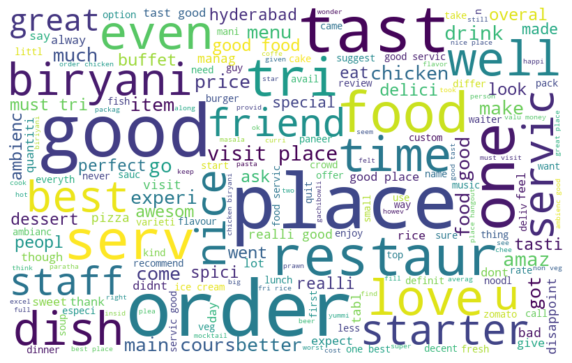

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in reviews_df['Review']])

from wordcloud import WordCloud
wordcloud = WordCloud( background_color = 'white', width=800, height=500, random_state=21, max_font_size=110)
wordcloud.generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#getting list of most used words in our data.
import collections
import re
words = re.findall(r'\w+', all_words)
most_common = collections.Counter(words).most_common(20)
most_common

[('good', 7011),
 ('food', 6546),
 ('place', 6007),
 ('order', 3600),
 ('servic', 3246),
 ('chicken', 3046),
 ('tast', 2982),
 ('ambienc', 2045),
 ('time', 2040),
 ('tri', 2035),
 ('one', 1993),
 ('great', 1940),
 ('visit', 1875),
 ('like', 1815),
 ('realli', 1659),
 ('serv', 1591),
 ('also', 1577),
 ('nice', 1510),
 ('best', 1433),
 ('restaur', 1430)]

In [ ]:
most_common_dict= dict(most_common)
x= list(most_common_dict.keys())
y= list(most_common_dict.values())

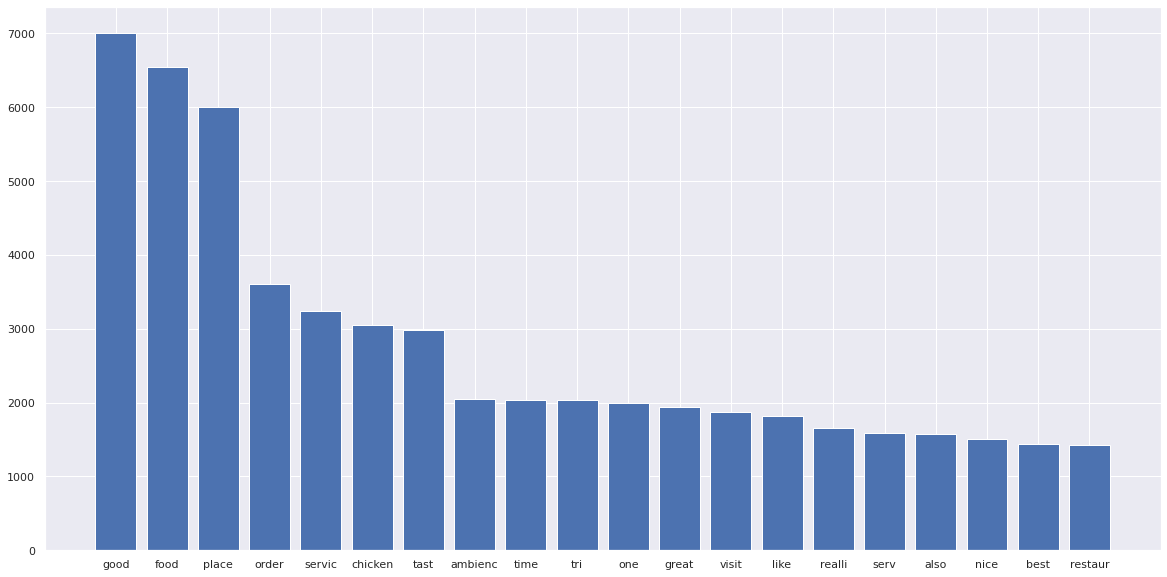

In [ ]:
plt.rcParams['figure.figsize']= (20,10)
plt.bar(x , y)
plt.show()

## **Feature Encoding**

In [ ]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment

In [ ]:
reviews_df['sentiment']=reviews_df['Rating'].apply(lambda x:sentiment(x))

In [ ]:
reviews_df['sentiment'].value_counts()

0    6315
1    3639
Name: sentiment, dtype: int64

In [ ]:
reviews_df.tail(10)

level_0  index        Restaurant                 Reviewer  \
9944     9954   9990  Chinese Pavilion             Akram Ul Haq   
9945     9955   9991  Chinese Pavilion  Krishna Teja Ratnakaram   
9946     9956   9992  Chinese Pavilion               Sujay Garg   
9947     9957   9993  Chinese Pavilion              Richard Rao   
9948     9958   9994  Chinese Pavilion     Shiladitya Chaudhury   
9949     9959   9995  Chinese Pavilion         Abhishek Mahajan   
9950     9960   9996  Chinese Pavilion           Sharad Agrawal   
9951     9961   9997  Chinese Pavilion                Ramandeep   
9952     9962   9998  Chinese Pavilion          Nayana Shanbhag   
9953     9963   9999  Chinese Pavilion         Bhargava Krishna   

                                                 Review  Rating  \
9944  amaz food alway go want chines food favourit c...     5.0   
9945  never fan chines food visit chines pavilionban...     5.0   
9946  visit restaur friend immedi blown away qualiti...     5.0   
9947  im go cut chase food excel must say honey chic...     5.0   
9948  chines pavilion banjara hill first chines rest...     1.5   
9949  madhumathi mahajan well start nice courteous s...     3.0   
9950  place never disappoint us food courteous staff...     4.5   
9951  bad rate main chicken bone found veg food acce...     1.5   
9952  person love prefer chines food coupl time husb...     4.0   
9953  check tri delici chines food seen nonveg lunch...     3.5   

                    Time  Pictures  Reviews  Followers    Year  Month   Day  \
9944 2016-06-16 13:53:00       0.0      3.0      128.0  2016.0    6.0  16.0   
9945 2016-06-15 00:50:00       0.0      9.0       54.0  2016.0    6.0  15.0   
9946 2016-06-15 00:04:00       0.0      4.0        1.0  2016.0    6.0  15.0   
9947 2016-06-14 18:35:00       0.0      3.0       74.0  2016.0    6.0  14.0   
9948 2016-06-05 10:49:00       0.0      6.0        3.0  2016.0    6.0   5.0   
9949 2016-06-05 00:08:00       0.0     53.0       54.0  2016.0    6.0   5.0   
9950 2016-06-04 22:01:00       0.0      2.0       53.0  2016.0    6.0   4.0   
9951 2016-06-03 10:37:00       3.0     65.0      423.0  2016.0    6.0   3.0   
9952 2016-05-31 17:22:00       0.0     13.0      144.0  2016.0    5.0  31.0   
9953 2016-05-31 16:41:00       6.0    472.0     1302.0  2016.0    5.0  31.0   

      Hour  sentiment  
9944  13.0          0  
9945   0.0          0  
9946   0.0          0  
9947  18.0          0  
9948  10.0          1  
9949   0.0          1  
9950  22.0          0  
9951  10.0          1  
9952  17.0          0  
9953  16.0          0

In [ ]:
sentiment_df = reviews_df[['Review','sentiment']]
sentiment_df.head()

Review  sentiment
0  ambienc good food quit good saturday lunch cos...          0
1  ambienc good pleasant even servic prompt food ...          0
2  must tri great food great ambienc thnx servic ...          0
3  soumen das arun great guy behavior sincereti g...          0
4  food goodw order kodi drumstick basket mutton ...          0

In [ ]:
# Creating our Dependent and independent variable.
X = sentiment_df['Review']
Y = sentiment_df['sentiment']

In [ ]:
#importing CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Applying CountVectorizer
cv =  CountVectorizer(max_features=5000)
X= cv .fit_transform(X).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(9954, 5000)

## **Model Building**



## Sentiment analysis superviesd

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

## **Train Test Split**

In [ ]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (6967, 5000)
X_test.shape :  (2987, 5000)
y_train.shape :  (6967,)
y_test.shape :  (2987,)


# **Decision Tree**

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

#Performance Metrics
dtree_accuracy= accuracy_score(dtree_predictions,y_test)
dtree_precision= precision_score(dtree_predictions,y_test)
dtree_recall= recall_score(dtree_predictions,y_test)

print('Performance of Decision Tree Classifier')
print('Accuracy :' , dtree_accuracy)
print('Precision :', dtree_precision)
print('Recall :', dtree_recall)

Performance of Decision Tree Classifier
Accuracy : 0.7231335788416471
Precision : 0.5173951828724354
Recall : 0.6697459584295612


In [ ]:
dtree_Auc_roc = roc_auc_score(dtree_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(dtree_predictions,y_test))

roc_auc_score for test set :  0.7073387972251531


In [ ]:
print('Classification Report:')
print(classification_report(dtree_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      2121
           1       0.52      0.67      0.58       866

    accuracy                           0.72      2987
   macro avg       0.68      0.71      0.69      2987
weighted avg       0.75      0.72      0.73      2987



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

#Performance Metrics
logreg_accuracy = accuracy_score(logreg_predictions,y_test)
logreg_precision = precision_score(logreg_predictions,y_test)
logreg_recall= recall_score(logreg_predictions,y_test)

print('Performance of Logistic Regression')
print('Accuracy :' ,logreg_accuracy)
print('Precision :', logreg_precision)
print('Recall :', logreg_recall)

Performance of Logistic Regression
Accuracy : 0.8624037495815199
Precision : 0.7698483496877788
Recall : 0.8494094488188977


In [ ]:
logreg_Auc_roc = roc_auc_score(logreg_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(logreg_predictions,y_test))

roc_auc_score for test set :  0.8592557137549588


In [ ]:
print('Classification Report:')
print(classification_report(logreg_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1971
           1       0.77      0.85      0.81      1016

    accuracy                           0.86      2987
   macro avg       0.84      0.86      0.85      2987
weighted avg       0.87      0.86      0.86      2987



# **KNN Classifier**

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)

print('Performance of K-nearest neighbour Classifier')
print('Accuracy :' ,knn_accuracy)
print('Precision :',knn_precision)
print('Recall :',knn_recall)

Performance of K-nearest neighbour Classifier
Accuracy : 0.7532641446267158
Precision : 0.4977698483496878
Recall : 0.7622950819672131


In [ ]:
knn_Auc_roc = roc_auc_score(knn_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(knn_predictions,y_test))

roc_auc_score for test set :  0.7563138381011232


In [ ]:
print('Classification Report:')
print(classification_report(knn_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2255
           1       0.50      0.76      0.60       732

    accuracy                           0.75      2987
   macro avg       0.70      0.76      0.71      2987
weighted avg       0.81      0.75      0.77      2987



# **Random Forest Clssifier**

In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier()
rcf.fit(X_train, y_train)
rcf_predictions= rcf.predict(X_test)

#Performance Metrics
rcf_accuracy= accuracy_score(rcf_predictions,y_test)
rcf_precision= precision_score(rcf_predictions,y_test)
rcf_recall= recall_score(rcf_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_accuracy)
print('Precision :',rcf_precision)
print('Recall :',rcf_recall)

Performance of Random Forest classifier
Accuracy : 0.8563776364245062
Precision : 0.7002676181980375
Recall : 0.8940774487471527


In [ ]:
rcf_Auc_roc = roc_auc_score(rcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_predictions,y_test))

roc_auc_score for test set :  0.8673801183991808


In [ ]:
print('Classification Report:')
print(classification_report(rcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2109
           1       0.70      0.89      0.79       878

    accuracy                           0.86      2987
   macro avg       0.83      0.87      0.84      2987
weighted avg       0.88      0.86      0.86      2987



# **XGBoost Classifier**

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgbcf = XGBClassifier()
xgbcf.fit(X_train, y_train)
xgbcf_predictions= xgbcf.predict(X_test)

#Performance Metrics
xgbcf_accuracy= accuracy_score(xgbcf_predictions,y_test)
xgbcf_precision= precision_score(xgbcf_predictions,y_test)
xgbcf_recall= recall_score(xgbcf_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,xgbcf_accuracy)
print('Precision :', xgbcf_precision)
print('Recall :', xgbcf_recall)

Performance of XGBoost classifier
Accuracy : 0.8218948778038165
Precision : 0.5976806422836753
Recall : 0.8921438082556591


In [ ]:
xgbcf_Auc_roc = roc_auc_score(xgbcf_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(xgbcf_predictions,y_test))

roc_auc_score for test set :  0.8452221724641444


In [ ]:
print('Classification Report:')
print(classification_report(xgbcf_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2236
           1       0.60      0.89      0.72       751

    accuracy                           0.82      2987
   macro avg       0.78      0.85      0.79      2987
weighted avg       0.87      0.82      0.83      2987



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
# CatBoost Classifier
from catboost import CatBoostClassifier
cb_model=CatBoostClassifier(verbose=0)
cb_model.fit(X_train, y_train)
cb_model_predictions= cb_model.predict(X_test)

#Performance Metrics
cb_model_accuracy= accuracy_score(cb_model_predictions,y_test)
cb_model_precision= precision_score(cb_model_predictions,y_test)
cb_model_recall= recall_score(cb_model_predictions,y_test)

print('Performance of XGBoost classifier')
print('Accuracy :' ,cb_model_accuracy)
print('Precision :', cb_model_precision)
print('Recall :', cb_model_recall)

Performance of XGBoost classifier
Accuracy : 0.8490123870103783
Precision : 0.7002676181980375
Recall : 0.8722222222222222


In [ ]:
cb_model_Auc_roc = roc_auc_score(cb_model_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(cb_model_predictions,y_test))

roc_auc_score for test set :  0.8556127881595059


In [ ]:
print('Classification Report:')
print(classification_report(cb_model_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2087
           1       0.70      0.87      0.78       900

    accuracy                           0.85      2987
   macro avg       0.82      0.86      0.83      2987
weighted avg       0.87      0.85      0.85      2987



# **Hyperparameter Tuning on Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto'],
    'max_depth' : [7,8],
     'criterion' :['gini']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
#Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rcf_cv= RandomForestClassifier(max_depth=8,n_estimators=300,max_features='auto',criterion='gini')
rcf_cv.fit(X_train, y_train)
rcf_cv_predictions= rcf_cv.predict(X_test)

#Performance Metrics
rcf_cv_accuracy= accuracy_score(rcf_cv_predictions,y_test)
rcf_cv_precision= precision_score(rcf_cv_predictions,y_test)
rcf_cv_recall= recall_score(rcf_cv_predictions,y_test)

print('Performance of Random Forest classifier')
print('Accuracy :' ,rcf_cv_accuracy)
print('Precision :',rcf_cv_precision)
print('Recall :',rcf_cv_recall)

Performance of Random Forest classifier
Accuracy : 0.6796116504854369
Precision : 0.1471900089206066
Recall : 0.9939759036144579


In [ ]:
rcf_cv_AUc_roc = roc_auc_score(rcf_cv_predictions,y_test)

In [ ]:
print('roc_auc_score for test set : ',roc_auc_score(rcf_cv_predictions,y_test))

roc_auc_score for test set :  0.8275444920411884


In [ ]:
print('Classification Report:')
print(classification_report(rcf_cv_predictions,y_test))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2821
           1       0.15      0.99      0.26       166

    accuracy                           0.68      2987
   macro avg       0.57      0.83      0.53      2987
weighted avg       0.95      0.68      0.77      2987



# **Comparision of Performance of all Models**

In [ ]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'CatBoost Classifier', 
              'Random Forest', 'XGBoost'],
    'Test accuracy': [dtree_accuracy, logreg_accuracy, knn_accuracy, cb_model_accuracy, rcf_accuracy, xgbcf_accuracy, ],
    'Precision': [dtree_precision, logreg_precision, knn_precision, cb_model_precision, rcf_precision, xgbcf_precision, ],
    'Recall': [dtree_recall, logreg_recall, knn_recall, cb_model_recall, rcf_recall, xgbcf_recall, ],
    'Auc-Roc Score': [dtree_Auc_roc, logreg_Auc_roc, knn_Auc_roc, cb_model_Auc_roc, rcf_Auc_roc ,xgbcf_Auc_roc]})

models.sort_values(by='Test accuracy', ascending=False).reset_index()

index                Model  Test accuracy  Precision    Recall  \
0      1  Logistic Regression       0.862404   0.769848  0.849409   
1      4        Random Forest       0.856378   0.700268  0.894077   
2      3  CatBoost Classifier       0.849012   0.700268  0.872222   
3      5              XGBoost       0.821895   0.597681  0.892144   
4      2  K Nearest Neighbour       0.753264   0.497770  0.762295   
5      0        Decision Tree       0.723134   0.517395  0.669746   

   Auc-Roc Score  
0       0.859256  
1       0.867380  
2       0.855613  
3       0.845222  
4       0.756314  
5       0.707339

Observation:

We can see from above table that Logistic Regression have highest Test Accuracy and Precision. but Random Forest has highest AUc-roc score.
From above observations we can say that Logistic Regression and Random Forest are our best Models.

# **Conclusion**

That's it! We reached the end of our exercise.Starting with loading the data so far we have done EDA, null values treatment, encoding of categorical columns, feature selection, and then model building.


*   For clustering, we have decided on 5 clusters after the Silhouette score plot and elbow plot where we used KMeans clustering algorithm.
*   For Sentiment Analysis  we have implemented six different models to predict the sentiment of Reviews. Logistic Regression, Random Forest Classifier, Decision Tree, CatBoost Classifier, K Nearest Neighbour and Xgboost Classifier.


 

*    Logistic Regression  and Random Forest model performed the best among them. In this way, we can explore more from various textual data and Reviews. Our models will try to predict the various sentiments correctly.







